#**HPDP Assignment 2**
###**Group Members**
| No. | Name                               | Matric Number |
| --- | ---------------------------------- | ------------- |
| 1   | Nurul Erina Binti Zainuddin        | A22EC0254     |
| 2   | Nur Arini Fatihah Binti Mohd Sabir | A22EC0244     |

<br>

###**Table of Contents**
| No. | Section                               |
| --- | ------------------------------------- |
| 1.0 | Setup Kaggle API and Download Dataset |
| 2.0 | Upload Dataset to Google Drive        |
| 3.0 | Pandas                                |
| 4.0 | Dask                                  |
| 5.0 | Polars                                |
| 6.0 | Performance Comparison                |

<br>

In [ ]:
import pandas as pd

## **1.0 Setup Kaggle API and Download Dataset**

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nrulerina","key":"0a0c5584b38ad14a93b34df9c03eda89"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set up Kaggle API access
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d stoney71/new-york-city-transport-statistics

Dataset URL: https://www.kaggle.com/datasets/stoney71/new-york-city-transport-statistics
License(s): unknown
 99% 1.29G/1.30G [00:11<00:00, 39.4MB/s]
100% 1.30G/1.30G [00:11<00:00, 120MB/s] 


In [ ]:
# Step 4: Unzip the dataset
!unzip -o new-york-city-transport-statistics.zip -d ./nyc_transport

Archive:  new-york-city-transport-statistics.zip
  inflating: ./nyc_transport/mta_1706.csv  
  inflating: ./nyc_transport/mta_1708.csv  
  inflating: ./nyc_transport/mta_1710.csv  
  inflating: ./nyc_transport/mta_1712.csv  


## **2.0 Upload Dataset to Google Drive**

In [ ]:
# Mount to drive to upload dataset
from google.colab import drive
drive.mount('/content/drive')

# If error disconnect and delete runtime first

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
save_path = '/content/drive/MyDrive/Assign2/nyc_transport_data'
os.makedirs(save_path, exist_ok=True)

In [ ]:
# Define the full output file path
output_file = os.path.join(save_path, 'mta_1712.csv')

# Save the DataFrame in MyDrive
file_path = '/content/nyc_transport/mta_1712.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')
df.to_csv(output_file, index=False)

print(f"✅ File successfully saved to: {output_file}")


✅ File successfully saved to: /content/drive/MyDrive/Assign2/nyc_transport_data/mta_1712.csv


## **3.0 Pandas**

In [1]:
import pandas as pd
import os
import psutil
import time

In [2]:
# Connect to drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Start Performance Tracking
process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / 1024 ** 2
start_time = time.time()

# Load the dataset from MyDrive
file_path = '/content/drive/MyDrive/Assign2/nyc_transport_data/mta_1712.csv'
df_pandas = pd.read_csv(file_path)

# Brief Inspection Before Cleaning
print("📂 Dataset Inspection Before Cleaning with Pandas")
print("✅ Shape of the dataset:", df_pandas.shape)
print("\n📌 Column Names:")
cols = df_pandas.columns
for i in range(0, len(cols), 9):
    print(", ".join(cols[i:i+9]))
print("\n🧠 Data Types:")
print(df_pandas.dtypes)

duplicate_count = df_pandas.duplicated().sum()
print(f"\n🔁 Duplicate Rows: {duplicate_count}")

missing_vals = df_pandas.isnull().sum()
print("\n❌ Missing Values (count per column):")
print(missing_vals[missing_vals > 0])

# Remove duplicate rows
df_pandas = df_pandas.drop_duplicates()

# Drop rows with all Nans
df_pandas = df_pandas.dropna(how='all')

# Fill non-critical missing values (example: fill missing text with 'Unknown', coordinates with 0.0)
df_pandas.loc[:,'DirectionRef'] = df_pandas['DirectionRef'].fillna(-1)
df_pandas.loc[:,'OriginName'] = df_pandas['OriginName'].fillna('Unknown')
df_pandas.loc[:,'OriginLat'] = df_pandas['OriginLat'].fillna(0.0)
df_pandas.loc[:,'OriginLong'] = df_pandas['OriginLong'].fillna(0.0)
df_pandas.loc[:,'DestinationLat'] = df_pandas['DestinationLat'].fillna(0.0)
df_pandas.loc[:,'DestinationLong'] = df_pandas['DestinationLong'].fillna(0.0)
df_pandas.loc[:,'NextStopPointName'] = df_pandas['NextStopPointName'].fillna('Unknown')
df_pandas.loc[:,'ArrivalProximityText'] = df_pandas['ArrivalProximityText'].fillna('Unknown')
df_pandas.loc[:,'DistanceFromStop'] = df_pandas['DistanceFromStop'].fillna(0.0)
df_pandas.loc[:,'ExpectedArrivalTime'] = df_pandas['ExpectedArrivalTime'].fillna('Unknown')
df_pandas.loc[:,'ScheduledArrivalTime'] = df_pandas['ScheduledArrivalTime'].fillna('Unknown')

# End Performance tracking
mem_after = process.memory_info().rss / 1024 ** 2
end_time = time.time()

# Calculate Performance
pandas_mem_used = mem_after - mem_before
pandas_exe_time = end_time - start_time

print("\n📊 Performance Before Optimization")
print(f"🔄 Memory Used: {(pandas_mem_used ):.2f} MB")
print(f"⏱️ Execution Time: {pandas_exe_time:.2f} seconds")

📂 Dataset Inspection Before Cleaning with Pandas
✅ Shape of the dataset: (6461384, 17)

📌 Column Names:
RecordedAtTime, DirectionRef, PublishedLineName, OriginName, OriginLat, OriginLong, DestinationName, DestinationLat, DestinationLong
VehicleRef, VehicleLocation.Latitude, VehicleLocation.Longitude, NextStopPointName, ArrivalProximityText, DistanceFromStop, ExpectedArrivalTime, ScheduledArrivalTime

🧠 Data Types:
RecordedAtTime                object
DirectionRef                 float64
PublishedLineName             object
OriginName                    object
OriginLat                    float64
OriginLong                   float64
DestinationName               object
DestinationLat               float64
DestinationLong              float64
VehicleRef                    object
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
NextStopPointName             object
ArrivalProximityText          object
DistanceFromStop             float64
ExpectedArrivalTime        

In [4]:
# Brief Inspection After Cleaning
print("📂 Dataset Inspection After Cleaning with Pandas")
print("✅ Shape of the dataset:", df_pandas.shape)

duplicate_count = df_pandas.duplicated().sum()
print(f"\n🔁 Duplicate Rows: {duplicate_count}")

missing_vals = df_pandas.isnull().sum()
print("\n❌ Missing Values (count per column):")
print(missing_vals[missing_vals > 0])

📂 Dataset Inspection After Cleaning with Pandas
✅ Shape of the dataset: (6435162, 17)

🔁 Duplicate Rows: 0

❌ Missing Values (count per column):
Series([], dtype: int64)


##**4.0 Dask**

In [4]:
!pip install dask

In [5]:
import dask.dataframe as dd
import pandas as pd
import os
import psutil
import time

In [1]:
# Connect to drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Start Performance Tracking
process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / 1024 ** 2
start_time = time.time()

# Load less data
usecols = ['RecordedAtTime','OriginName', 'DestinationName', 'VehicleRef','NextStopPointName',
           'ExpectedArrivalTime', 'ScheduledArrivalTime']

# Optimize data types
dtype_map = {
    'RecordedAtTime': 'object',
    'OriginName': 'category',
    'DestinationName': 'category',
    'VehicleRef': 'category',
    'NextStopPointName': 'category',
    'ExpectedArrivalTime': 'object',
    'ScheduledArrivalTime': 'object'
}

# Chunking, Dask Dataframe
file_path = '/content/drive/MyDrive/Assign2/nyc_transport_data/mta_1712.csv'
df_dask = dd.read_csv(file_path, usecols=usecols, assume_missing=True, dtype=dtype_map, blocksize="128MB")

# Sampling
df_dask = df_dask.sample(frac=0.01, random_state=42)

# Brief Inspection Before Cleaning
print("📂 Dataset Inspection Before Cleaning with Dask")
print("✅ Shape of the dataset:", (len(df_dask), len(df_dask.columns)))
print("\n📌 Column Names:")
print(", ".join(df_dask.columns))
print("\n🧠 Data Types:")
print(df_dask.dtypes)

# Apply category dtype to relevant columns
categorical_cols = [col for col in dtype_map.keys() if dtype_map[col] == 'category']
for col in categorical_cols:
    if col in df_dask.columns:
        df_dask[col] = df_dask[col].astype('category')
        df_dask[col] = df_dask[col].map_partitions(lambda s: s.cat.add_categories('Unknown') if 'Unknown' not in
                                                   s.cat.categories else s)

# Fill missing values
fill_values = {
    'RecordedAtTime': 'Unknown',
    'OriginName': 'Unknown',
    'DestinationName': 'Unknown',
    'VehicleRef': 'Unknown',
    'NextStopPointName': 'Unknown',
    'ExpectedArrivalTime': 'Unknown',
    'ScheduledArrivalTime': 'Unknown'
}

print("\nDask partitions:", df_dask.npartitions)

df_dask = df_dask.fillna(fill_values)
df_dask = df_dask.drop_duplicates()
df_dask = df_dask.compute()

# End Performance tracking
mem_after = process.memory_info().rss / 1024 ** 2
end_time = time.time()

# Calculate Performance
dask_mem_used = mem_after - mem_before
dask_exe_time = end_time - start_time

print("\n📊 Performance With Optimization Using Dask")
print(f"🔄 Memory Used: {(dask_mem_used):.2f} MB")
print(f"⏱️ Execution Time: {dask_exe_time:.2f} seconds")

📂 Dataset Inspection Before Cleaning with Dask
✅ Shape of the dataset: (64614, 7)

📌 Column Names:
RecordedAtTime, OriginName, DestinationName, VehicleRef, NextStopPointName, ExpectedArrivalTime, ScheduledArrivalTime

🧠 Data Types:
RecordedAtTime          string[pyarrow]
OriginName                     category
DestinationName                category
VehicleRef                     category
NextStopPointName              category
ExpectedArrivalTime     string[pyarrow]
ScheduledArrivalTime    string[pyarrow]
dtype: object

Dask partitions: 10

📊 Performance With Optimization Using Dask
🔄 Memory Used: 309.72 MB
⏱️ Execution Time: 60.04 seconds


In [ ]:
# Brief Inspection After Cleaning

print("📂 Dataset Inspection After Cleaning with Dask")
print("✅ Shape of the dataset:", df_dask.shape)

duplicate_count = df_dask.duplicated().sum()
print(f"\n🔁 Duplicate Rows: {duplicate_count}")

# ❌ Missing Values (count per column)
missing_vals = df_dask.isnull().sum()
print("\n❌ Missing Values (count per column):")
print(missing_vals[missing_vals > 0])

📂 Dataset Inspection After Cleaning with Dask
✅ Shape of the dataset: (64610, 7)

🔁 Duplicate Rows: 0

❌ Missing Values (count per column):
Series([], dtype: int64)


## **5. Polars**

In [7]:
!pip install polars

In [8]:
import polars as pl
import os
import time
import psutil

In [16]:
# Connect to drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Start Performance Tracking
process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / 1024 ** 2
start_time = time.time()

# Define file path
file_path = '/content/drive/MyDrive/Assign2/nyc_transport_data/mta_1712.csv'

# Define columns to use (for manual selection if desired)
usecols = ['RecordedAtTime', 'OriginName', 'DestinationName', 'VehicleRef',
           'NextStopPointName', 'ExpectedArrivalTime', 'ScheduledArrivalTime']

fill_values = {
    'RecordedAtTime': 'Unknown',
    'OriginName': 'Unknown',
    'DestinationName': 'Unknown',
    'VehicleRef': 'Unknown',
    'NextStopPointName': 'Unknown',
    'ExpectedArrivalTime': 'Unknown',
    'ScheduledArrivalTime': 'Unknown'
}

# Read as LazyFrame
df_lazy = pl.read_csv(file_path, columns=usecols, low_memory=True).lazy()

# Inspect schema
schema = df_lazy.collect_schema()

# Brief Inspection Before Cleaning
print("📂 Dataset Inspection Before Cleaning with Polars")
row_count = df_lazy.select(pl.len()).collect().item()
print("✅ Shape of the dataset:", (row_count, len(schema)))
print("\n📌 Column Names:")
print(", ".join(schema.keys()))
print("\n🧠 Data Types:")
for col, dtype in schema.items():
    print(f"{col}: {dtype}")

# Fill nulls and cast categoricals (build expressions)
expressions = []
for col, fill_val in fill_values.items():
    expr = pl.col(col).fill_null(fill_val)
    if col in ['OriginName', 'DestinationName', 'VehicleRef', 'NextStopPointName']:
        expr = expr.cast(pl.Categorical)
    expressions.append(expr.alias(col))

df_polars = df_lazy.collect(streaming=True)
df_polars = (df_polars.with_columns(expressions).unique())

# End Performance Tracking
mem_after = process.memory_info().rss / 1024 ** 2
end_time = time.time()

# Performance summary
polars_mem_used = mem_after - mem_before
polars_exe_time = end_time - start_time

print("\n📊 Performance With Optimization Using Polars Lazy")
print(f"🔄 Memory Used: {polars_mem_used:.2f} MB")
print(f"⏱️ Execution Time: {polars_exe_time:.2f} seconds")

📂 Dataset Inspection Before Cleaning with Polars
✅ Shape of the dataset: (6461384, 7)

📌 Column Names:
RecordedAtTime, OriginName, DestinationName, VehicleRef, NextStopPointName, ExpectedArrivalTime, ScheduledArrivalTime

🧠 Data Types:
RecordedAtTime: String
OriginName: String
DestinationName: String
VehicleRef: String
NextStopPointName: String
ExpectedArrivalTime: String
ScheduledArrivalTime: String

📊 Performance With Optimization Using Polars Lazy
🔄 Memory Used: 922.66 MB
⏱️ Execution Time: 11.64 seconds


In [5]:
# Brief Inspection After Cleaning

print("📂 Dataset Inspection After Cleaning with {Polars}")
print("✅ Shape of the dataset:", (df_polars.shape))

duplicate_count = df_polars.is_duplicated().sum()
print(f"\n🔁 Duplicate Rows: {duplicate_count}")

# ❌ Missing Values (count per column)
missing_vals = df_polars.select([
    pl.col(col).is_null().sum().alias(col)
    for col in df_polars.columns
])

# Filter only columns with missing values
missing_vals_filtered = missing_vals.row(0)
missing_with_values = {col: count for col, count in zip(df_polars.columns, missing_vals_filtered) if count > 0}

print("\n❌ Missing Values (count per column):")
if missing_with_values:
    for col, count in missing_with_values.items():
        print(f"{col}: {count}")
else:
    print("No missing values found.")

📂 Dataset Inspection After Cleaning with {Polars}
✅ Shape of the dataset: (6435162, 7)

🔁 Duplicate Rows: 0

❌ Missing Values (count per column):
No missing values found.


## **6.0 Performance Comparison**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

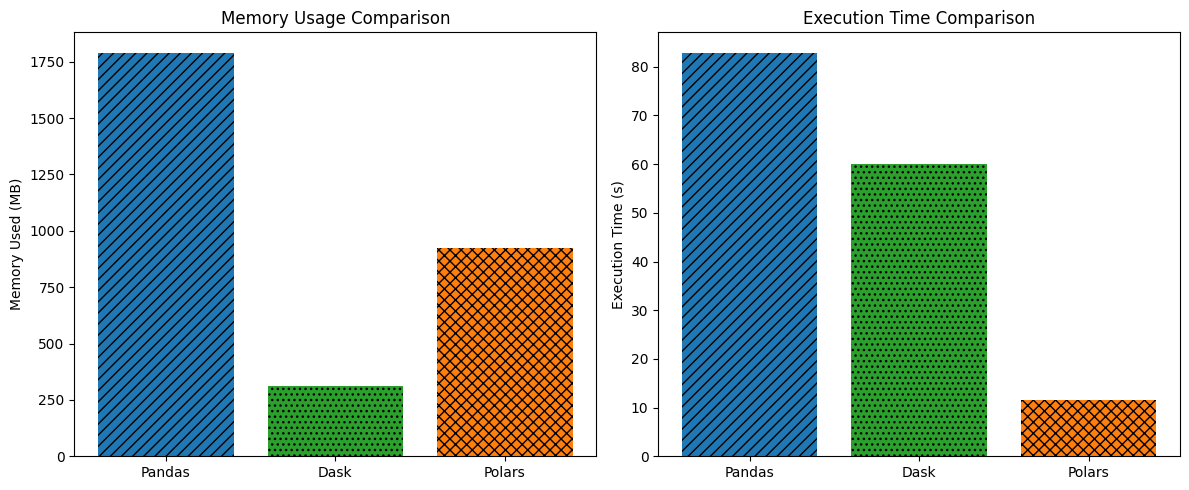

In [12]:
df = pd.DataFrame({
    'Method': ['Pandas', 'Dask', 'Polars'],
    'Memory Used (MB)': [pandas_mem_used, dask_mem_used, polars_mem_used],
    'Execution Time (s)': [pandas_exe_time, dask_exe_time, polars_exe_time]
})

# Step 2: Set up colors and hatches for each method
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']   # Blue, Green, Orange
hatches = ['///', '...', 'xxx']             # Unique patterns

# Step 3: Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Memory Usage Plot
bars1 = axes[0].bar(df['Method'], df['Memory Used (MB)'], color=colors)
axes[0].set_title('Memory Usage Comparison')
axes[0].set_ylabel('Memory Used (MB)')
for bar, hatch in zip(bars1, hatches):
    bar.set_hatch(hatch)

# Execution Time Plot
bars2 = axes[1].bar(df['Method'], df['Execution Time (s)'], color=colors)
axes[1].set_title('Execution Time Comparison')
axes[1].set_ylabel('Execution Time (s)')
for bar, hatch in zip(bars2, hatches):
    bar.set_hatch(hatch)

# Final Layout
plt.tight_layout()
plt.show()